Part 1: Introduction and Background

Introduction:
Our project stems from our group’s interest in renewable energy sources, and their implications for public health. Recent condemnations of coal, and other “dirty” energy sources inspired us to look for implications that these power sources could be correlated to high death rates. If a correlation was found, potential future experimentation establishing causation may lead to a quicker transition to cleaner, renewable energies and better public health. Our research question, therefore, was “How do different types of energies affect the death rates of each state? Furthermore, is there a correlation between coal production and pneumonia?” Our hypothesis is that we will find a positive correlation between states with coal powered power plants and states with high pneumonia death rates.

The background research we did provided some evidence that our hypothesis might hold true. “Pollution from vehicles and coal powered power plants can cause serious environmental hazards. Pollution related diseases range from mild to severe and can significantly affect one’s quality of life. Air pollution can result in asthma, chronic obstructive pulmonary disorder or COPD and lung cancer. Long-term exposure may increase respiratory infections in general population. Children and the elderly are most vulnerable to fine particulate matter and other airborne toxicants.” (Bagher, et al.). In other words, Bagher, et al. found evidence that pollution could cause respiratory illnesses, which would in turn support our hypothesis that dirty energy, specifically coal, could be correlated with high rates of pneumonia deaths. Additionally, in “The Health Impacts of Energy Choices” authors Wang and Orris state that clean energy will improve public health, as air pollution causes millions of premature deaths every year (Wang and Orris). These sources indicated to us that while there seems to be a relationship between air pollution and poor health, there could be a more specific correlation between coal energy and pneumonia deaths.

We were aware that there could be potential biases and issues with our data. First, it is important to note that whatever our findings, we cannot claim any causation. Our research could only possibly provide evidence of a correlation between our data sets. Also, we considered the fact that there could be multiple confounds that weren’t accurately represented by only two data sets. To begin to rectify this, we included a third set, state GDP, to attempt to normalize our death data set. Finally, we acknowledge the possibility that there could be biases within the data sets themselves; for example, many pneumonia deaths could have gone unreported, potentially skewing our results. 
 
Bagher, Askari Mohammad, et al. "Effect of Using Renewable Energy in Public Health." Bulletin of Advanced Scientific Research, 2015, pp. 139-46. Research Gate, www.researchgate.net/publication/304422160_Effect_of_Using_Renewable_Energy_in_Public_Health. Accessed 10 June 2017.
Wang, Jennifer S., and Peter Orris. "The Health Impacts of Energy Choices." Health Energy Initiative, 2015.

To reiterate:

Research Question:
 
How do different types of energies affect the death rates of each state? Furthermore, is there a correlation between coal production and pneumonia? 

Hypotheses:
 
Cleaner energy states will have lower death rates than those that use “dirty” energy. We expect to find a positive correlation between coal production and pneumonia deaths. 



Part 2: Data Description 

We chose 3 different sets of data that we wanted to analyze and compare to one another. First was the mortality reports throughout the years 1962-2016 in the United States. For our analysis we focused on the years 1997-2006 for the reports of pneumonia. We decided to compare this information to a data set about types of energy sources across the globe with information consisting of energy capacity, location, and type. We focused on just the information from the United States to better compare with the death data stated previously. 

Lastly, we chose to analyze a data set about state GDP across the same years 1997-2006 to control for and test the normalization of the death rates of pneumonia with certain energy sources or types in certain areas. Using these 3 sets we hope to find a positive correlation between them to show some sort of possible relation.

Part 3: Data Cleaning and Pre-Processing

In [1]:
# This is our import library, it contains all the packages that our team will be using to visualize, analyze,
# and draw conslusions for and from our data.
import pandas as pd
import numpy as np
import patsy
import statsmodels.api as sm
from scipy.stats import ttest_ind
%matplotlib inline
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import normaltest
from sklearn.cluster import KMeans
from scipy.cluster.vq import whiten
from sklearn.decomposition import PCA

In [2]:
# This cell details the process of cleaning the data set for Power Consumption by state.
# First it imports and saves the raw data, then drops all non-essential information.
# Next this cell changes columns to be easier to read and more uniform with other data sets.
# The mean is taken and assigned to a seperate data set that will be used later.
df_power= pd.read_csv('power_data.csv', sep=None, engine='python')
df_power = df_power.query('MSN == ["CLTCP"]')[['State','1997','1998','1999','2000','2001','2002','2003','2004','2005','2006']]
df_power = df_power.rename(columns = {'StateCode' : 'State'})
df_power = df_power.rename(columns = {'MSN' : 'Energy Type'})
df_power = df_power.assign(PowerMean=df_power.mean(axis=1))
df_power2 = df_power.drop(['1997','1998','1999','2000','2001','2002','2003','2004','2005','2006'], axis=1)

In [3]:
# This cell details the cleaning of the Number of Deaths and Death Rates data set by state.
# After the file has been imported and read it limits the number of years we will be looking at (1997 to 2006)
# It is originally sorted by week, so we used the .sum function to add each week together for a yearly total
# Finally we pivoted the table so that it closely resembled the same format as our other data sets.
df_death= pd.read_csv('death_data.csv', sep=None, engine='python')
df_death = df_death[['Year','State','Pneumonia and Influenza Deaths']]
df_death = df_death[(df_death.Year >= 1997) & (df_death.Year <=2006)]
df_death = df_death.groupby(['Year','State'], as_index=False).sum()
df_death = df_death.pivot_table(index = 'State', columns = 'Year', values = 'Pneumonia and Influenza Deaths')
df_death = df_death.assign(DeathMean=df_death.mean(axis=1))
df_deathmean = df_death.DeathMean

In [4]:
# This cell changes the result of the previous cell from Seris to DataFrame so that it can be merged later.
df_deathmean = df_deathmean.to_frame().reset_index()

In [5]:
# This cell details the cleaning of our GDP data set 
# After the file has been imported and read, it drops unneeded rows and columns.
# It should be noted that the raw data used both full state name and statecodes, this was filtered out to resemble other data sets
# Columns were renamed so that merging would be easier to do in the future. 
df_GDP = pd.read_csv('GDP_data.csv', sep=None, engine='python')
df_GDP.drop(['Year','Unnamed: 2', 'Unnamed: 3'], axis=1, inplace=True)
df_GDP = df_GDP.drop(df_GDP.index[0])
df_GDP= df_GDP.dropna(axis=0, how='any')
df_GDP = df_GDP.rename(columns = {'Unnamed: 1' : 'State'})
df_GDP = df_GDP.assign(GDPMean=df_GDP.mean(axis=1))
df_GDP2 = df_GDP.drop(['1997','1998','1999','2000','2001','2002','2003','2004','2005','2006'], axis=1)

In [6]:
# This cell merges the mean data gathered from the Energy data set and the GDP data set.
df_merge1 = pd.merge(df_power2, df_GDP2, how='left',on='State')

In [7]:
# This cell merges the remaining mean data from our Death data set and the previusly merged data set.
df_merge2 = pd.merge(df_merge1, df_deathmean, how='left', on='State')
# df_merge2

In [8]:
# This cell creates a new data frame called statepop that allows us to adjust the means in merge2
# Then it merges those values into df_merge2 so that we can easily calculate the Mean per capita
df_statepop = pd.Series({'AL' : 4447100, 'AK' : 626932, 'AZ' : 5130632, 'AR' : 2673400, 'CA' : 33871648, 'CO' : 4301261, 'CT' : 3405565, 'DE' : 783600, 'FL' : 15982378, 'GA' : 8186453, 'HI' : 1211537, 'ID' : 1293953, 'IL' : 12419293, 'IN' : 6080485, 'IA' : 2926324,
               'KS' : 2688418, 'KY' : 4041769, 'LA' : 4468976, 'ME' : 1274923, 'MD' : 5296486, 'MA' : 6349097, 'MI' : 9938444, 'MN' : 4919479, 'MS' : 2844658, 'MO' : 5595211, 'MT' : 902195, 'NE' : 1711263, 'NV' : 1998257, 'NH' : 1235786, 'NJ' : 8414350, 'NM' : 1819046, 'NY' : 18976457, 'NC' : 8049313, 'ND' : 642200, 'OH' : 11353140, 'OK' : 3450654, 'OR' : 3421399, 'PA' : 12281054, 'RI' : 1048319, 'SC' : 4012012, 'SD' : 754844, 'TN' : 5689283, 'TX' : 20851820, 'UT' : 2233169, 'VT' : 608827, 'VA' : 7078515, 'WA' : 5894121, 'WV' : 1808344, 'WI' : 5363675, 'WY' : 493782})

df_statepop = df_statepop.to_frame()
df_statepop = pd.DataFrame(df_statepop).reset_index()
df_statepop.columns = ['State', 'Population']
df_merge2 = pd.merge(df_merge2, df_statepop, how='right', on='State')
df_merge2.dropna(inplace=True)

In [9]:
df_merge2.loc[:,'PowerMean'] /= 1000
df_merge2.loc[:,'DeathMean']*=1000000
df_merge2.loc[:,'GDPMean']*=1000000

In [10]:
# This cell calculates the Mean per capita for the values in merge2
df_merge2['DeathMean'] = df_merge2['DeathMean']/df_merge2['Population']
df_merge2['GDPMean'] =   df_merge2['GDPMean']  /df_merge2['Population']

In [11]:
# This cell cleans out df_merge2
df_merge2 = df_merge2.drop('Population', axis=1)

In [12]:
# This graph shows 3 things : 1st The amount of coal burned by each state in Million Short Tons
#                             2nd The GDP per capita
#                             3rd The number of pneumonia deaths per 1,000,000 deaths 
df_merge2

,State,PowerMean,GDPMean,DeathMean
1,AL,38.5525,28375.750489,275.572845
2,AR,14.9150,27338.482831,56.968654
3,AZ,20.2000,33723.369752,199.468603
4,CA,2.9600,39797.104056,193.515828
5,CO,19.4618,41732.831372,169.740920
6,CT,1.6767,49222.258274,217.849314
7,DE,1.8936,58817.381317,53.471159
8,FL,29.6117,33092.860149,93.046229
9,GA,35.5919,37386.521366,52.904475
10,HI,0.7984,37103.447934,228.139958


Part 4: Data Visualization
S here is where we will begin the visual part of this Project. I would like to list all the data frames we have currently:

1) df_power : this contains all power consumptions from 1997 to 2006 and the mean

2) df_death : this contains all the deaths for each state from 1997 to 2006 and the mean

3) df_GDP : this contains all the GDPS for each state from 1997 to 2006 and the mean

4) df_merge2 : This contains all the means for each of the abose data frames and the states they are in.

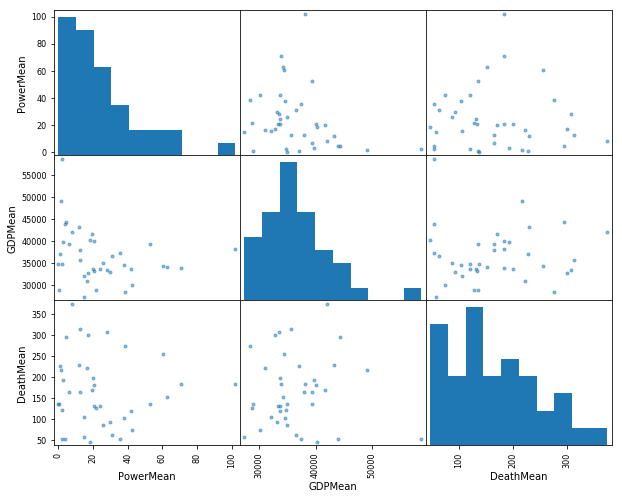

In [13]:
# This group of graphs just shows basic trends within the mean data we have gathered through a varity of graphs.
fig = pd.scatter_matrix(df_merge2, figsize=[10,8])

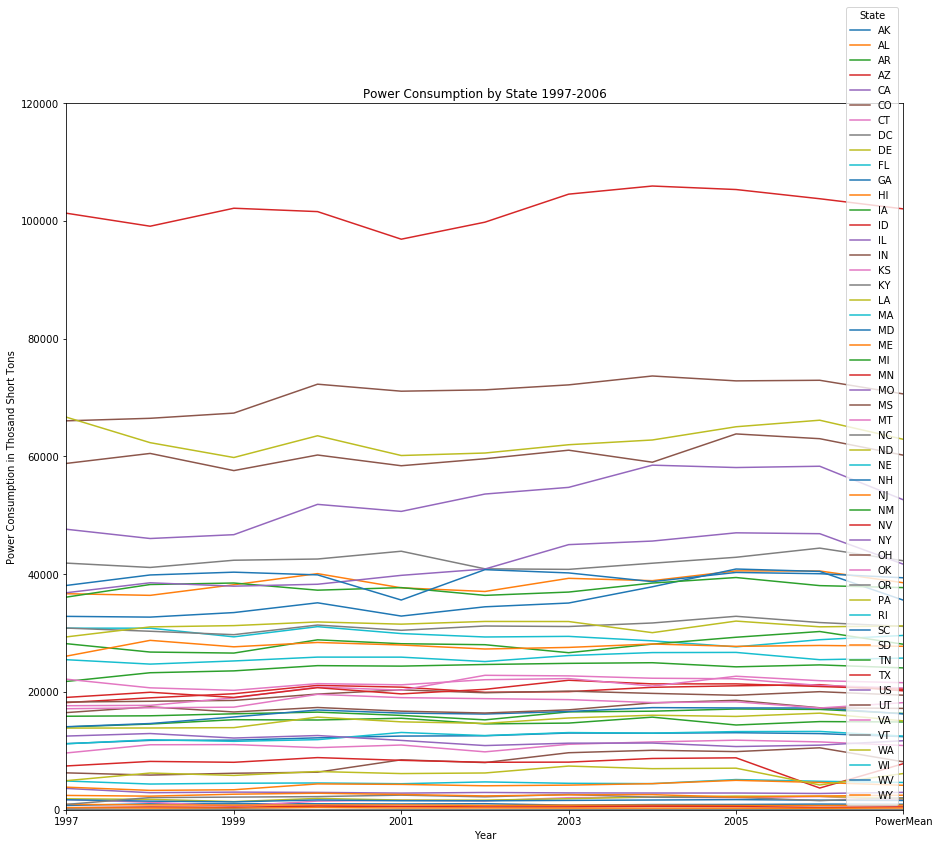

In [14]:
# This graph shows a comparision of Power Consumption by State from 1997 to 2006.
# This helps visualize the changes of Power Consumption over time.
df_power = df_power.set_index('State')
df_power3=df_power.transpose()
figPower = df_power3.plot(figsize=[15,13], ylim=[0,120000], title='Power Consumption by State 1997-2006')
figPower.set_ylabel('Power Consumption in Thosand Short Tons')
figPower.set_xlabel('Year')

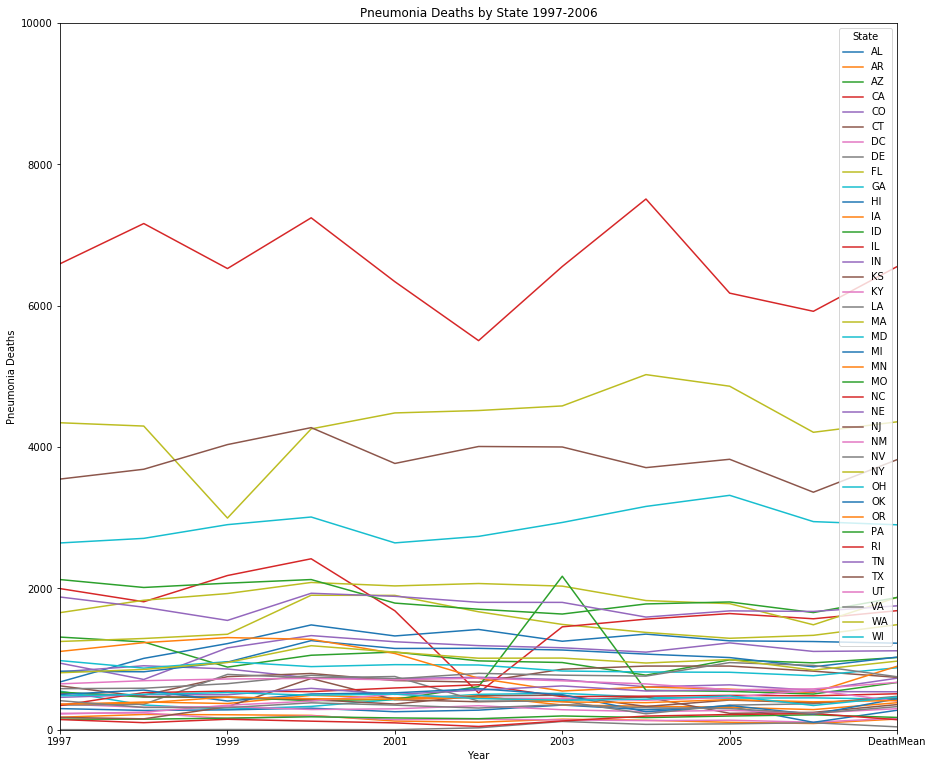

In [15]:
# This graph shows the comparision of Pneumonia and influenzia deaths to time from 1997 to 2006.
# This helps visualize the changing number of deaths per year.
df_death2=df_death.transpose()
df_death2
fig2 = df_death2.plot(figsize=[15,13], ylim=[0,10000], title='Pneumonia Deaths by State 1997-2006')
fig2.set_ylabel('Pneumonia Deaths')
fig2.set_xlabel('Year')

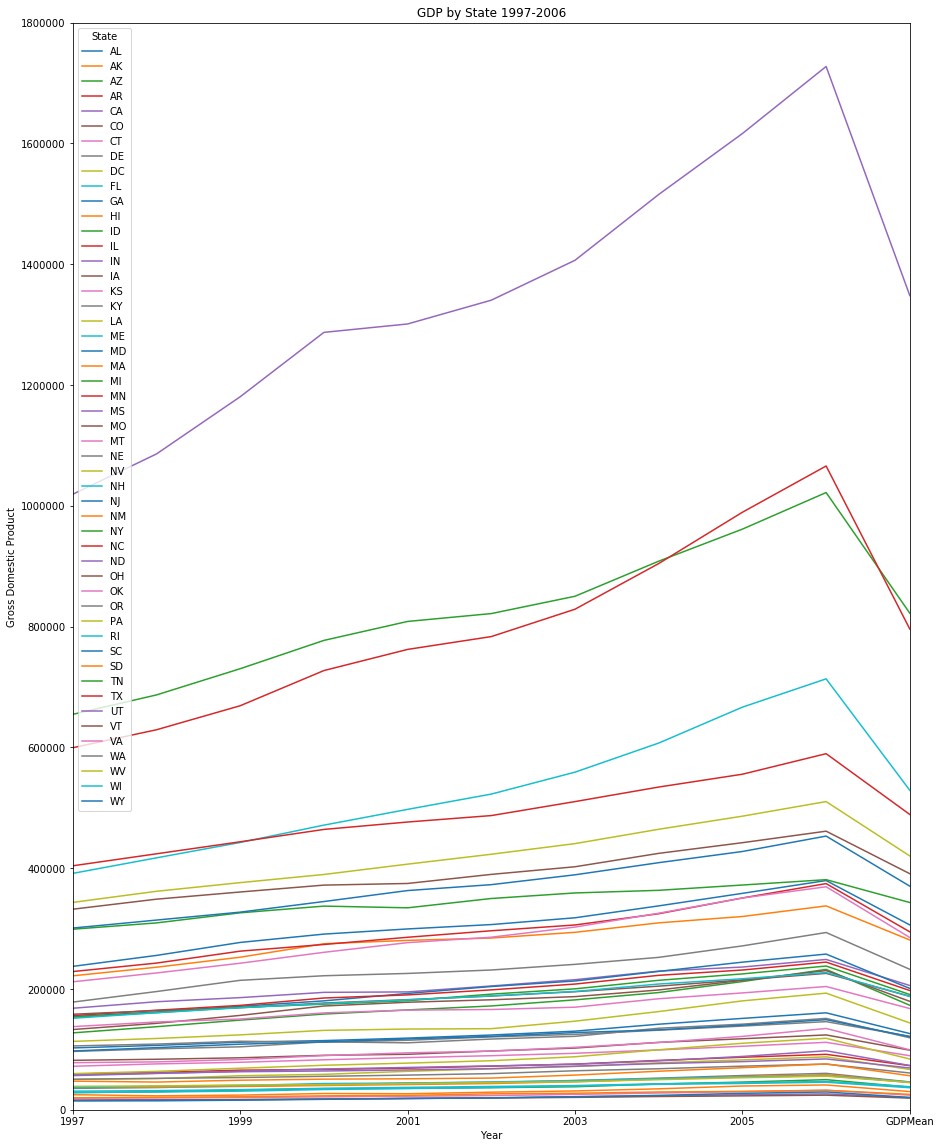

In [16]:
# This graph shows the groth and decline of state's GDPs from 1997 to 2006.
# This visualization helps show the changes of GDP over time.
df_GDP = df_GDP.set_index('State')
df_GDP3=df_GDP.transpose()
figGDP = df_GDP3.plot(figsize=[15,20], ylim=[0,1800000], title='GDP by State 1997-2006')
figGDP.set_ylabel('Gross Domestic Product')
figGDP.set_xlabel('Year')

[]

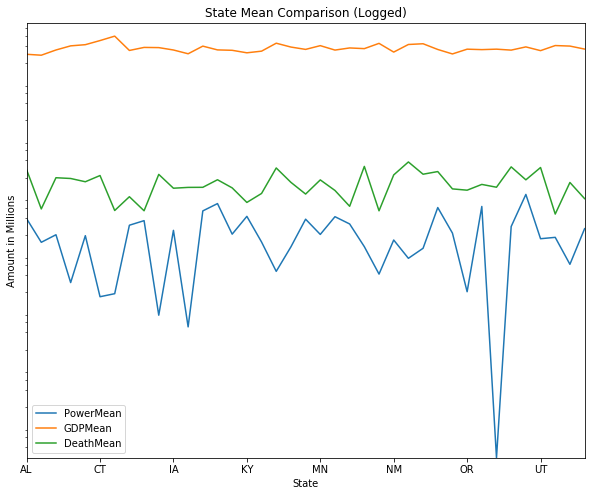

In [17]:
# This graph compares the means of Power Consumption, Death Rate, and state GDP.
# This visual helps show the possible correlations between each mean.
fig5 = df_merge2.plot(x=df_merge2['State'],figsize=[10,8], ylim=[0,100000], logy=True, title='State Mean Comparison (Logged)')
fig5.set_ylabel('Amount in Millions')
fig5.set_yticks([])

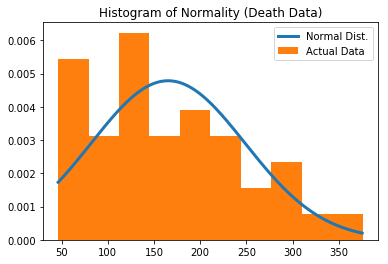

In [18]:
# This graph shows the comparison of a normal distribution to the data we had for our Death dataset mean.
# The data shows that there is no significant divergence from normality.
xs = np.arange(df_merge2['DeathMean'].min(), df_merge2['DeathMean'].max())
fit = stats.norm.pdf(xs, np.mean(df_merge2['DeathMean']), np.std(df_merge2['DeathMean']))
plt.plot(xs, fit, label='Normal Dist.', lw=3)
plt.hist(df_merge2['DeathMean'], normed=True, label='Actual Data');
plt.legend();
plt.title('Histogram of Normality (Death Data)');

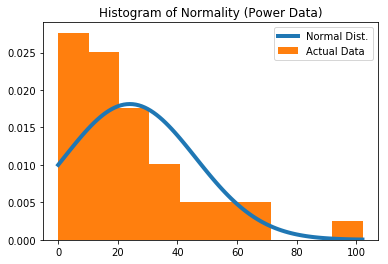

In [19]:
# This graph shows the comparison of a normal distribution to the data we had for our Power Consumption dataset mean.
# The data shows that there is a significant divergence from normality.
xs = np.arange(df_merge2['PowerMean'].min(), df_merge2['PowerMean'].max())
fit = stats.norm.pdf(xs, np.mean(df_merge2['PowerMean']), np.std(df_merge2['PowerMean']))
plt.plot(xs, fit, label='Normal Dist.', lw=4)
plt.hist(df_merge2['PowerMean'], normed=True, label='Actual Data');
plt.legend();
plt.title('Histogram of Normality (Power Data)');

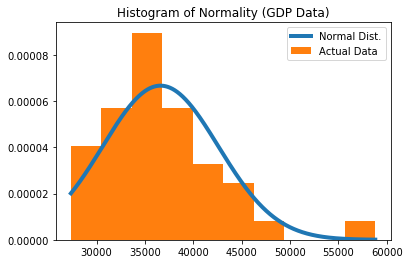

In [20]:
# This graph shows the comparison of a normal distribution to the data we had for our State's GDP dataset mean.
# The data shows there there is no significant divergence from normality.
xs2 = np.arange(df_merge2['GDPMean'].min(), df_merge2['GDPMean'].max())
fit = stats.norm.pdf(xs2, np.mean(df_merge2['GDPMean']), np.std(df_merge2['GDPMean']))
plt.plot(xs2, fit, label='Normal Dist.', lw=4)
plt.hist(df_merge2['GDPMean'], normed=True, label='Actual Data');
plt.legend();
plt.title('Histogram of Normality (GDP Data)');

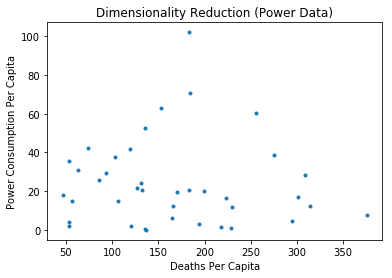

In [21]:
# This uses Dimensionality Reduction to compare the Power Consumption mean to the Death mean.
fig6 = plt.plot(df_merge2['DeathMean'].values, df_merge2['PowerMean'].values, '.')
plt.title('Dimensionality Reduction (Power Data)');
plt.xlabel('Deaths Per Capita')
plt.ylabel('Power Consumption Per Capita')

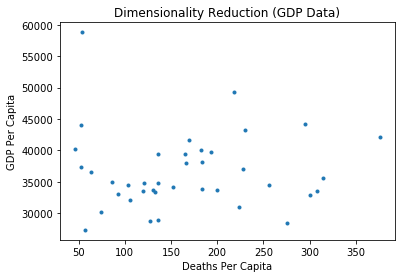

In [22]:
# This uses Dimensionality Reduction to compare the State GDP mean to the Death mean.
fig7 = plt.plot(df_merge2['DeathMean'].values, df_merge2['GDPMean'].values, '.')
plt.title('Dimensionality Reduction (GDP Data)');
plt.xlabel('Deaths Per Capita')
plt.ylabel('GDP Per Capita')

Part 5: Data Analysis and Results

In [23]:
# Using OLS Regression, we look into more detailed analysis of how our data is related.
# This method looks to calculate how well the data is able to predict the values for our other data.
# This specific test is testing to see whether or not Death rates can be predicted from Power data.
outcome_1, predictors_1 = patsy.dmatrices('DeathMean ~ PowerMean',df_merge2)
mod_1 = sm.OLS(outcome_1, predictors_1)
res_1 = mod_1.fit()
print(res_1.summary())

                            OLS Regression Results                            
Dep. Variable:              DeathMean   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.025
Method:                 Least Squares   F-statistic:                   0.07627
Date:                Mon, 12 Jun 2017   Prob (F-statistic):              0.784
Time:                        17:26:05   Log-Likelihood:                -227.83
No. Observations:                  39   AIC:                             459.7
Df Residuals:                      37   BIC:                             463.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    169.4478     20.274      8.358      0.0

In [24]:
# # This specific test is testing to see whether or not Death rates can be predicted from GDP data.
outcome_3, predictors_3 = patsy.dmatrices('DeathMean ~ GDPMean',df_merge2)
mod_3 = sm.OLS(outcome_3, predictors_3)
res_3 = mod_3.fit()
print(res_3.summary())

                            OLS Regression Results                            
Dep. Variable:              DeathMean   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.027
Method:                 Least Squares   F-statistic:                  0.007525
Date:                Mon, 12 Jun 2017   Prob (F-statistic):              0.931
Time:                        17:26:05   Log-Likelihood:                -227.87
No. Observations:                  39   AIC:                             459.7
Df Residuals:                      37   BIC:                             463.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    158.0414     85.027      1.859      0.0

In [25]:
# This specific test is testing to see whether or not Death rates can be predicted from Power consumption rates after it
# has been controled for by our confounding variable.
outcome_2, predictors_2 = patsy.dmatrices("df_merge2['DeathMean'] ~ GDPMean + PowerMean",df_merge2)
mod_2 = sm.OLS(outcome_2, predictors_2)
res_2 = mod_2.fit()
print(res_2.summary())

                              OLS Regression Results                              
Dep. Variable:     df_merge2['DeathMean']   R-squared:                       0.002
Model:                                OLS   Adj. R-squared:                 -0.053
Method:                     Least Squares   F-statistic:                   0.03718
Date:                    Mon, 12 Jun 2017   Prob (F-statistic):              0.964
Time:                            17:26:06   Log-Likelihood:                -227.83
No. Observations:                      39   AIC:                             461.7
Df Residuals:                          36   BIC:                             466.7
Df Model:                               2                                         
Covariance Type:                nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   

Part 6: Conclusions and Discussion

From the data gathered in the above sections of this report, we can conclude confidently that there is no significant relationship between the number of a state's pnuemonia deaths and its coal consumption. We are able to conclude this due to the results of our OLS regression results. In every case in which the number of deaths are tested (whether it be against GDP, power consumption, or both) the resulting p value is greater than .05. This expresses a lack of significance and signifys that we can not predict the data. Ultimantly this means there is no correlation. This result does not confirm our hypothesis. The null hypothesis is confirmed. 

Although these results are confident in their findings there is much discussion that can be had. Going further, there are several ways that our results could be improved upon. The variables and data sets our lab used can always be improved upon. An increased temporal range could produce different results. Different variables could be used to compare as well. Where our lab used only coal consumption, fossil fuels exist beyond just coal. Crude oil, natural gas, and other resources may produce varying results. Another issue our results may have is the measure of pneumonia deaths. There may be a better variable to study and test that can better reflect the effects of carbon emissions on the human body. For example testing to see if the number of pneumonia cases increased (not just deaths). This change may be a better metric to successfully establish correaltion between negative health effects and carbon emissions. 


